# **Installation**

In [ ]:
pip install mypy==0.910 flake8==5.0.4 tox==3.24.3 pytest==7.2.0 pytest-cov==4.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.6/85.6 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.8/316.8 kB 29.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.7/228.7 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 28.2 MB/s eta 0:00:00
  Created wheel for mypy-extensions: filename=mypy_extensions-0.4.4-py2.py3-none-any.whl size=4474 sha256=aee011e1c471a54716254eb944fcbf1f1fc37a1a9800d1518f0

In [ ]:
pip install git+https://github.com/stefanradev93/bayesflow

  Cloning https://github.com/stefanradev93/bayesflow to /tmp/pip-req-build-xj5s6ngg
  Running command git clone --filter=blob:none --quiet https://github.com/stefanradev93/bayesflow /tmp/pip-req-build-xj5s6ngg
  Resolved https://github.com/stefanradev93/bayesflow to commit 000d2422c3c535e0717bd19c98f3561bd66f8f84
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 74.3 MB/s eta 0:00:00
  Created wheel for bayesflow: filename=bayesflow-1.1.2.dev20+g000d242-py3-none-any.whl size=176984 sha256=271abfb7546588ae99e7e644db00189d46b8b018210a5a9ced344619cd9d72bc
  Stored in directory: /tmp/pip-ephem-wheel-cache-6wyfnnnr/wheels/82/7f/4b/2ffc42b0612de31b4b6f38f6da40d372352a391c83260a68b6
Successfull

# **Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy import stats
from functools import partial
np.set_printoptions(suppress=True)
import seaborn as sns
from tqdm.notebook import tqdm
from scipy.stats import binom

import os
import sys

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers.schedules import PiecewiseConstantDecay
from tensorflow_probability import distributions as tfd
sys.path.append(os.path.abspath(os.path.join('../../..')))


In [ ]:
#from deep_bayes.models import BayesFlow, InvariantNetwork
#from deep_bayes.training import train_online
#from deep_bayes.losses import maximum_likelihood_loss
#from deep_bayes.viz import plot_true_est_scatter, plot_true_est_posterior

In [ ]:
from bayesflow.amortizers import AmortizedLikelihood, AmortizedPosterior, AmortizedPosteriorLikelihood
from bayesflow.networks import InvertibleNetwork, SequentialNetwork, DeepSet
from bayesflow.simulation import GenerativeModel, Prior, Simulator
from bayesflow.trainers import Trainer
from bayesflow.default_settings import MetaDictSetting
import bayesflow.diagnostics as diag
from bayesflow.diagnostics import plot_sbc_ecdf, plot_recovery, plot_posterior_2d, plot_losses, plot_latent_space_2d

ModuleNotFoundError: ignored

In [ ]:
#from python-utility-functions import feather_loader

# **Forward Simulator**

In [ ]:
def Prior_Morph():
  N_ext = np.random.uniform(0,5500)
  D_ext = np.random.uniform(0,3300)
  N = np.random.uniform(0,3000)
  D = np.random.uniform(0,3000)
  I = np.random.uniform(0,3000)
  E = np.random.uniform(0,3000)
  params = np.array([N, D, I, E, N_ext, D_ext])
  params = np.reshape(params,(1,6))
  return np.ceil(params)

In [ ]:
from scipy.integrate import solve_ivp
def ode_system(t, y, D_ext, N_ext, p, kc, kt, gamma, gamma_I, N0, D0, I0, E0):
  N,D,I,E = y                                                                              # Ref : Jagged–Delta asymmetry in Notch signaling can giverise to a Sender/Receiver hybrid phenotype
  Nt_dt = (N0 * (1+(I**p/(I0**p+I**p)))) - (kc * N * D) - (kt * N * D_ext) - gamma * N
  Dt_dt = (D0 * (I0**p/(I0**p+I**p))) - (kc*N*D) - (kt * N_ext * D) - (gamma * D)
  It_dt = (kt * N * D_ext) - (gamma_I * I)
  Et_dt = (1 * (I**p/(I0**p+I**p))) - (gamma * E)
  return [Nt_dt, Dt_dt, It_dt, Et_dt]

In [ ]:
def Nonlinear_ODE_solver(params):

  N = params[0, 0]
  D = params[0, 1]
  E = params[0, 2]
  I = params[0, 3]
  N_ext = params[0, 4]
  D_ext = params[0, 5]
  initial_cond =[N,D,E,I]

  sec_scale = 1                             #60*60/time_step
  T = (0,10)                             # (60*60*N_hours)/time_step)

  p = 2
  kc = (5*10**(-4))/(sec_scale)
  kt = (5*10**(-5))/(sec_scale)
  gamma = 0.1/(sec_scale)
  gamma_I = 0.5/(sec_scale)
  N0 = 500 /(sec_scale)
  D0 = 1000 /(sec_scale)
  I0 = 200                        #/(sec_scale)
  E0 = 1


  solution = solve_ivp(ode_system,T, initial_cond, method='LSODA', args=(D_ext, N_ext, p, kc, kt, gamma, gamma_I, N0, D0, I0, E0),max_step=0.01)
  t = solution.t
  N_sol, D_sol, I_sol, E_sol = solution.y
  y = np.stack([N_sol[-1], D_sol[-1], I_sol[-1], E_sol[-1]])
  y = np.reshape(y,(1,4))
  return y

# Online Simulator

In [ ]:
simulator = Simulator(simulator_fun=partial(Nonlinear_ODE_solver))

In [ ]:
prior = Prior(prior_fun=Prior_Morph, param_names=[r'$N$', r'$D$', r'$E$', r'$I$', r'$N_ext$', r'$D_ext$'])
prior_means, prior_stds = prior.estimate_means_and_stds()

In [ ]:
model = GenerativeModel(prior, simulator, name='ForwardSimulator')

INFO:root:Performing 2 pilot runs with the ForwardSimulator model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 1, 6)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 1, 4)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.


# Offline simulator

In [ ]:
def offline_simulator(N):
  data = {}
  data['Prior'] = np.ndarray((0,6))
  data['observation'] = np.ndarray((0,4))
  for i in range(N):
    params = Prior_Morph()
    data['Prior'] = np.concatenate((data['Prior'], params), axis=0)
    ode_solution = Nonlinear_ODE_solver(params)
    data['observation'] = np.concatenate((data['observation'], ode_solution), axis=0)
  return data


In [ ]:
data = offline_simulator(10000)


In [ ]:
training_data = {}
training_data['prior_draws'] = data['Prior']
training_data['sim_data'] = data['observation']

# *Export and Import Offline simulated data*

export

In [ ]:
import os
import pandas as pd
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Create a folder in the root directory
path = '/content/drive/My Drive/OfflineDataPrior'
df_prior_out = pd.DataFrame.from_dict(training_data['prior_draws'], orient='columns')
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_prior_out.to_csv(f)

path = '/content/drive/My Drive/OfflineDataSim'
df_sim_out = pd.DataFrame.from_dict(training_data['sim_data'], orient='columns')
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_sim_out.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df_prior_in = pd.read_csv('/content/drive/My Drive/OfflineDataPrior')
load_prior = np.stack([df_prior_in.iloc[:,1], df_prior_in.iloc[:,2], df_prior_in.iloc[:,3], df_prior_in.iloc[:,4], df_prior_in.iloc[:,5], df_prior_in.iloc[:,6]])
prior_in = np.array(list(zip(*load_prior[::1])))

load ={'prior_draws','sim_data'}
df_sim_in = pd.read_csv('/content/drive/My Drive/OfflineDataSim')
load_sim = np.stack([df_sim_in.iloc[:,1], df_sim_in.iloc[:,2], df_sim_in.iloc[:,3], df_sim_in.iloc[:,4]])
sim_in = np.array(list(zip(*load_sim[::1])))
training_data={}
training_data['prior_draws'] =prior_in
training_data['sim_data'] = sim_in

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Surrogate Model**

**Latent Distribution**

In [ ]:
latent_dist_p = tfd.MultivariateStudentTLinearOperator(
    df=50, loc=[0.]*6, scale=tf.linalg.LinearOperatorDiag([1.]*6))          # For two parameters
latent_dist_l = tfd.MultivariateStudentTLinearOperator(
    df=50, loc=[0.]*4, scale=tf.linalg.LinearOperatorDiag([1.]*4))         # For 4 output      #xxx For 20 time points

Amortized Likelihood

In [ ]:
coupling_settings = {
    'affine': {
        'dense_args': dict(units=128, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
        'dropout_prob': 0.05
    },
    'spline': {
        'dense_args': dict(units=128, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
        'dropout_prob': 0.05
    }
}
likelihood_net = InvertibleNetwork(num_params=4, num_coupling_layers=8,
                                   coupling_design='interleaved',coupling_settings=coupling_settings)

In [ ]:
amortized_likelihood = AmortizedLikelihood(surrogate_net=likelihood_net,latent_dist=latent_dist_l)

Likelihood Configurator

In [ ]:
def configurator_likelihood(forward_dict):        #           , min_trials=500, max_trials=500):
    """ Configures simulator outputs for use in BayesFlow training."""
    #N = np.random.randint(min_trials, max_trials + 1)
    #forward_dict['sim_data'] = forward_dict['sim_data'][:,:N]

    # We need two variables, but reaction times are only one
    # -> Create dummy variable
    #dummy = np.random.default_rng().normal(0, 1, forward_dict['sim_data'].shape)
    #forward_dict['sim_data'] = np.stack((forward_dict['sim_data'], dummy), axis=-1)

    input_dict = {}
    input_dict['conditions'] = forward_dict['prior_draws'].astype(np.float32)
    input_dict['observables'] = forward_dict['sim_data'].astype(np.float32)

    return input_dict

Training

In [ ]:
initial_learning_rate = 0.001
trainer = Trainer(
    amortizer=amortized_likelihood,
    configurator=configurator_likelihood,
    default_lr=initial_learning_rate,
    checkpoint_path="checkpoints/likelihood"
)

INFO:root:Trainer initialization: No generative model provided. Only offline learning mode is available!
INFO:root:Initialized empty loss history.
INFO:root:Initialized networks from scratch.


In [ ]:
decay_steps = 400000
num_sim = training_data['sim_data'].shape[0]
batch_size = 64
# calculate number of epochs needed to get desired number of iterations
epochs = 1000
history = trainer.train_offline(training_data, epochs=epochs, batch_size=batch_size)

Training epoch 1:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 2:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 3:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 4:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 5:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 6:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 7:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 8:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 9:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 10:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 11:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 12:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 13:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 14:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 15:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 16:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 17:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 18:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 19:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 20:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 21:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 22:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 23:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 24:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 25:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 26:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 27:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 28:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 29:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 30:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 31:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 32:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 33:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 34:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 35:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 36:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 37:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 38:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 39:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 40:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 41:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 42:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 43:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 44:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 45:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 46:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 47:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 48:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 49:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 50:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 51:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 52:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 53:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 54:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 55:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 56:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 57:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 58:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 59:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 60:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 61:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 62:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 63:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 64:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 65:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 66:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 67:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 68:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 69:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 70:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 71:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 72:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 73:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 74:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 75:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 76:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 77:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 78:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 79:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 80:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 81:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 82:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 83:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 84:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 85:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 86:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 87:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 88:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 89:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 90:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 91:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 92:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 93:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 94:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 95:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 96:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 97:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 98:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 99:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 100:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 101:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 102:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 103:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 104:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 105:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 106:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 107:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 108:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 109:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 110:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 111:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 112:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 113:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 114:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 115:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 116:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 117:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 118:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 119:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 120:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 121:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 122:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 123:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 124:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 125:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 126:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 127:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 128:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 129:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 130:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 131:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 132:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 133:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 134:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 135:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 136:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 137:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 138:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 139:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 140:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 141:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 142:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 143:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 144:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 145:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 146:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 147:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 148:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 149:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 150:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 151:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 152:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 153:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 154:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 155:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 156:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 157:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 158:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 159:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 160:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 161:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 162:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 163:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 164:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 165:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 166:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 167:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 168:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 169:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 170:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 171:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 172:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 173:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 174:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 175:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 176:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 177:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 178:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 179:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 180:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 181:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 182:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 183:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 184:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 185:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 186:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 187:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 188:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 189:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 190:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 191:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 192:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 193:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 194:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 195:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 196:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 197:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 198:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 199:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 200:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 201:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 202:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 203:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 204:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 205:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 206:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 207:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 208:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 209:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 210:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 211:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 212:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 213:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 214:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 215:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 216:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 217:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 218:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 219:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 220:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 221:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 222:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 223:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 224:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 225:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 226:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 227:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 228:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 229:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 230:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 231:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 232:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 233:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 234:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 235:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 236:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 237:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 238:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 239:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 240:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 241:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 242:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 243:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 244:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 245:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 246:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 247:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 248:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 249:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 250:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 251:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 252:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 253:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 254:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 255:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 256:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 257:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 258:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 259:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 260:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 261:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 262:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 263:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 264:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 265:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 266:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 267:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 268:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 269:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 270:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 271:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 272:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 273:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 274:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 275:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 276:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 277:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 278:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 279:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 280:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 281:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 282:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 283:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 284:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 285:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 286:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 287:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 288:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 289:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 290:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 291:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 292:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 293:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 294:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 295:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 296:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 297:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 298:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 299:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 300:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 301:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 302:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 303:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 304:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 305:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 306:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 307:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 308:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 309:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 310:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 311:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 312:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 313:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 314:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 315:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 316:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 317:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 318:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 319:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 320:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 321:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 322:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 323:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 324:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 325:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 326:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 327:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 328:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 329:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 330:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 331:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 332:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 333:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 334:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 335:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 336:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 337:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 338:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 339:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 340:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 341:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 342:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 343:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 344:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 345:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 346:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 347:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 348:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 349:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 350:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 351:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 352:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 353:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 354:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 355:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 356:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 357:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 358:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 359:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 360:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 361:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 362:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 363:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 364:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 365:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 366:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 367:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 368:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 369:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 370:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 371:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 372:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 373:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 374:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 375:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 376:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 377:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 378:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 379:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 380:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 381:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 382:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 383:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 384:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 385:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 386:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 387:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 388:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 389:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 390:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 391:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 392:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 393:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 394:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 395:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 396:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 397:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 398:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 399:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 400:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 401:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 402:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 403:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 404:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 405:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 406:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 407:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 408:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 409:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 410:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 411:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 412:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 413:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 414:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 415:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 416:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 417:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 418:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 419:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 420:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 421:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 422:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 423:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 424:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 425:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 426:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 427:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 428:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 429:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 430:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 431:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 432:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 433:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 434:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 435:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 436:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 437:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 438:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 439:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 440:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 441:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 442:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 443:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 444:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 445:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 446:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 447:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 448:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 449:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 450:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 451:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 452:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 453:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 454:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 455:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 456:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 457:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 458:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 459:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 460:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 461:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 462:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 463:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 464:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 465:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 466:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 467:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 468:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 469:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 470:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 471:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 472:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 473:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 474:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 475:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 476:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 477:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 478:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 479:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 480:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 481:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 482:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 483:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 484:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 485:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 486:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 487:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 488:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 489:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 490:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 491:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 492:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 493:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 494:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 495:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 496:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 497:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 498:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 499:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 500:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 501:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 502:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 503:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 504:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 505:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 506:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 507:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 508:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 509:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 510:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 511:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 512:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 513:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 514:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 515:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 516:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 517:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 518:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 519:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 520:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 521:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 522:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 523:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 524:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 525:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 526:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 527:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 528:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 529:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 530:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 531:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 532:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 533:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 534:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 535:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 536:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 537:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 538:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 539:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 540:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 541:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 542:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 543:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 544:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 545:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 546:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 547:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 548:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 549:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 550:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 551:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 552:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 553:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 554:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 555:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 556:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 557:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 558:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 559:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 560:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 561:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 562:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 563:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 564:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 565:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 566:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 567:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 568:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 569:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 570:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 571:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 572:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 573:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 574:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 575:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 576:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 577:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 578:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 579:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 580:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 581:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 582:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 583:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 584:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 585:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 586:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 587:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 588:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 589:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 590:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 591:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 592:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 593:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 594:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 595:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 596:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 597:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 598:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 599:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 600:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 601:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 602:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 603:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 604:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 605:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 606:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 607:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 608:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 609:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 610:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 611:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 612:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 613:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 614:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 615:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 616:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 617:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 618:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 619:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 620:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 621:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 622:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 623:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 624:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 625:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 626:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 627:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 628:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 629:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 630:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 631:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 632:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 633:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 634:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 635:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 636:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 637:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 638:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 639:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 640:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 641:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 642:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 643:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 644:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 645:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 646:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 647:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 648:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 649:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 650:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 651:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 652:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 653:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 654:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 655:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 656:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 657:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 658:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 659:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 660:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 661:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 662:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 663:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 664:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 665:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 666:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 667:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 671:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 672:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 673:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 674:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 675:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 676:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 677:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 678:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 679:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 680:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 681:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 682:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 683:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 684:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 685:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 686:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 687:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 688:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 689:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 690:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 691:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 692:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 693:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 694:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 695:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 696:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 697:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 698:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 699:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 700:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 701:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 702:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 703:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 704:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 705:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 706:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 707:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 708:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 709:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 710:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 711:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 712:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 713:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 714:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 715:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 716:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 717:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 718:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 719:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 720:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 721:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 722:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 723:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 724:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 725:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 726:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 727:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 728:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 729:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 730:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 731:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 732:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 733:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 734:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 735:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 736:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 737:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 738:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 739:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 740:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 741:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 742:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 743:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 744:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 745:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 746:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 747:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 748:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 749:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 750:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 751:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 752:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 753:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 754:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 755:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 756:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 757:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 758:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 759:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 760:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 761:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 762:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 763:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 764:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 765:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 766:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 767:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 768:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 769:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 770:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 771:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 772:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 773:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 774:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 775:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 776:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 777:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 778:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 779:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 780:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 781:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 782:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 783:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 784:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 785:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 786:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 787:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 788:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 789:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 790:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 791:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 792:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 793:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 794:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 795:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 796:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 797:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 798:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 799:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 800:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 801:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 802:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 803:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 804:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 805:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 806:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 807:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 808:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 809:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 810:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 811:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 812:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 813:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 814:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 815:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 816:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 817:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 818:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 819:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 820:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 821:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 822:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 823:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 824:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 825:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 826:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 827:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 828:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 829:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 830:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 831:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 832:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 833:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 834:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 835:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 836:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 837:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 838:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 839:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 840:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 841:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 842:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 843:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 844:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 845:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 846:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 847:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 848:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 849:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 850:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 851:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 852:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 853:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 854:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 855:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 856:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 857:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 858:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 859:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 860:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 861:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 862:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 863:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 864:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 865:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 866:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 867:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 868:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 869:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 870:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 871:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 872:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 873:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 874:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 875:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 876:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 877:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 878:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 879:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 880:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 881:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 882:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 883:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 884:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 885:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 886:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 887:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 888:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 889:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 890:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 891:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 892:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 893:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 894:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 895:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 896:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 897:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 898:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 899:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 900:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 901:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 902:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 903:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 904:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 905:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 906:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 907:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 908:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 909:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 910:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 911:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 912:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 913:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 914:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 915:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 916:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 917:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 918:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 919:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 920:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 921:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 922:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 923:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 924:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 925:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 926:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 927:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 928:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 929:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 930:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 931:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 932:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 933:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 934:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 935:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 936:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 937:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 938:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 939:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 940:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 941:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 942:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 943:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 944:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 945:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 946:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 947:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 948:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 949:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 950:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 951:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 952:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 953:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 954:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 955:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 956:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 957:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 958:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 959:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 960:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 961:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 962:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 963:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 964:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 965:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 966:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 967:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 968:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 969:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 970:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 971:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 972:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 973:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 974:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 975:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 976:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 977:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 978:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 979:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 980:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 981:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 982:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 983:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 984:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 985:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 986:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 987:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 988:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 989:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 990:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 991:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 992:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 993:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 994:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 995:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 996:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 997:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 998:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 999:   0%|          | 0/157 [00:00<?, ?it/s]

Training epoch 1000:   0%|          | 0/157 [00:00<?, ?it/s]

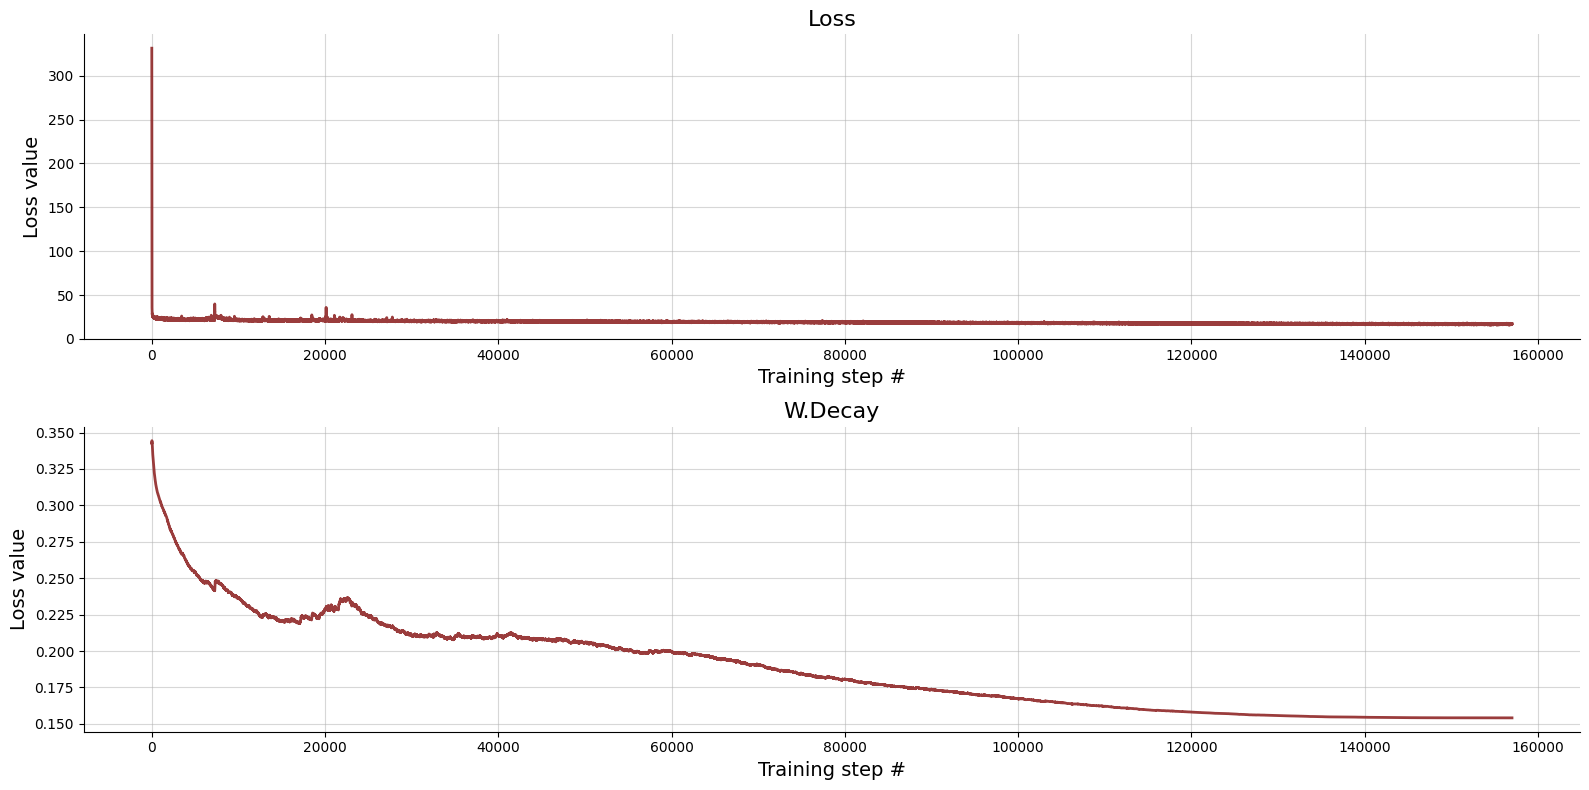

In [ ]:
fig = diag.plot_losses(history)

# ***Validation***

Liklihood Validation

simulate for test data

In [ ]:
testdata = offline_simulator(500)
#net_in={}
#net_in["conditions"]= testdata['Prior'].astype(np.float32)
#net_out = amortized_likelihood.sample(net_in, 10)


export test data

In [ ]:
import os
import pandas as pd
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Create a folder in the root directory
path = '/content/drive/My Drive/testDataPrior'
df_test_prior_out = pd.DataFrame.from_dict(testdata['Prior'], orient='columns')
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_test_prior_out.to_csv(f)

path = '/content/drive/My Drive/testDataSim'
df_test_sim_out = pd.DataFrame.from_dict(testdata['observation'], orient='columns')
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_test_sim_out.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import test data

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df_test_prior_in = pd.read_csv('/content/drive/My Drive/testDataPrior')
load_test_prior = np.stack([df_test_prior_in.iloc[:,1], df_test_prior_in.iloc[:,2], df_test_prior_in.iloc[:,3], df_test_prior_in.iloc[:,4], df_test_prior_in.iloc[:,5], df_test_prior_in.iloc[:,6]])
test_prior_in = np.array(list(zip(*load_test_prior[::1])))

load ={'prior_draws','sim_data'}
df_test_sim_in = pd.read_csv('/content/drive/My Drive/testDataSim')
load_test_sim = np.stack([df_test_sim_in.iloc[:,1], df_test_sim_in.iloc[:,2], df_test_sim_in.iloc[:,3], df_test_sim_in.iloc[:,4]])
test_sim_in = np.array(list(zip(*load_test_sim[::1])))
testdata={}
testdata['Prior'] =test_prior_in
testdata['observation'] = test_sim_in

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


validate

In [ ]:
net_in={}
net_in["conditions"]= testdata['Prior'].astype(np.float32)
net_out = amortized_likelihood.sample(net_in, 100)
truth = testdata['observation']
samples_avg = np.mean(net_out, axis = 1)
predict = np.asarray(samples_avg, dtype = 'float')
(abs((abs(truth)-abs(predict))/(truth))*100)[:,1]

array([   1.02305067, 1979.97620709,    0.83588116, 1955.91767832,
        109.29752719,    1.04256074,    0.66128901,   16.73859331,
          0.11795233,    4.71317933,    0.87939496,    3.44880542,
          0.18215685,   21.5255213 ,    1.564164  ,    2.56297707,
          0.19698332,    0.07564069,    4.50124853,    0.98201791,
        164.8855527 , 1749.66394783,    5.6593406 ,    0.05596541,
          0.39864809,   20.14917299,    0.15619299,    1.11639358,
          1.0968682 ,    0.73807559,   14.95615625,    0.31443923,
          0.47933439,    1.98594706,    1.17845572,    1.42931199,
          4.09243318,    1.38907263,    3.09385591,    0.4191418 ,
       1586.07351735,    2.84263499,    1.30368494,    0.15315181,
         13.60411221,    1.14183139,    2.76783463,    0.04185184,
         18.0896947 ,    1.66074667,    0.89703827,    3.69276151,
         23.63665824,    0.75204085,    0.76814961,   14.21911021,
          0.70646322,    1.93094133,    0.30291675,    2.02162

(array([[435.,  19.,  11.,   7.,  22.],
        [459.,   7.,   2.,   0.,   7.],
        [420.,  21.,  20.,   4.,  28.],
        [412.,  18.,   9.,  16.,  29.]]),
 array([  0.,  25.,  50.,  75., 100., 400.]),
 <a list of 4 BarContainer objects>)

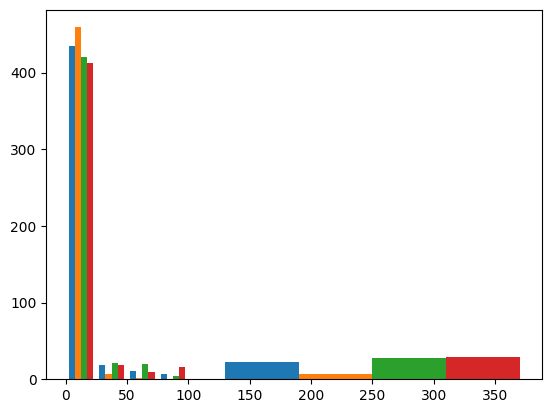

In [ ]:
plt.hist((abs((abs(truth)-abs(predict))/(truth))*100)[:,(0,1,2,3)], bins = [0, 25, 50, 75, 100, 400])

# Old Version of Generative Model

In [ ]:
def prior_sample():
    """
    Implements batch sampling from a stationary prior over the parameters
    of the non-stationary SIR model.
    """

    N_ext = np.random.uniform(500,5500)
    D_ext = np.random.uniform(2500,3300)
    N_0 = 1000
    I_0 = 0
    E_0 = 0
    D_0 = 3000

    params = np.array([N_ext, D_ext, N_0, I_0, E_0, D_0])
    params = np.reshape(params,(1,6))
    return np.ceil(params)


In [ ]:
def Nonlinear_Solver(params, T, p = 2, kc = 5.e-4,
                     kt = 5.e-5, gamma = 0.1,
                     gamma_I = 0.5, N0 = 500,
                     I0 = 200, E0 = 1, D0 = 1000):
    """Performs a forward simulation with Euler method for the Nonlinear ODE model given a random draw from the prior,"""


    # Extract parameters
    N_ext = params[0]
    D_ext = params[1]
    #print('N_ext,D_ext:',N_ext,D_ext)

    # Initial conditions
    N = params[2]
    I = params[3]
    E = params[4]
    D = params[5]

    # Simulate T+1 timesteps
    for t in range(T):

      I_new = (I[-1]**p)/(I0**p+I[-1]**p)
      k_new = kt * D_ext * N[-1]

      N_t = (N0 * (1+I_new) - kc * N[-1] * D[-1] - k_new - gamma * N[-1])/(10) + N[-1]
      I_t = (k_new - gamma_I * I[-1])/(10) + I[-1]
      E_t = (E0 * (I_new) - gamma * E[-1])/(10) + E[-1]
      D_t = (D0*(I_new)-kc*N[-1]*D[-1] - k_new - gamma * D[-1])/(10) + D[-1]

      N.append(N_t)
      I.append(I_t)
      D.append(D_t)
      E.append(E_t)


    return np.stack([N, I, D, E])

In [ ]:
def simulate(N,T):
  data = {}
  data['Prior'] = np.ndarray((0,2))
  data['Time_Series'] = np.ndarray((0,4,T+1))
  for i in range(N):
    prior = prior_mor()
    data['Prior'] = np.concatenate((data['Prior'], prior), axis=0)
  for p in tqdm(range(data['Prior'].shape[0])):
    TS = Nonlinear_Solver(data['Prior'][p],T).reshape((1,4,T+1))
    data['Time_Series'] = np.concatenate((data['Time_Series'], TS), axis=0)
  return data

In [ ]:
T = 199
d = simulate(4,T)
x = np.linspace(0, 1, num=T+1)
params = d['Prior']
sim_data = d['Time_Series']
fig, ax = plt.subplots(1, 4, figsize=(15, 10))
ax = ax.flat

for i, data in enumerate(sim_data):
    ax[i].plot(x, data[0])
    ax[i].plot(x, data[1])
    ax[i].plot(x, data[2])
    ax[i].plot(x, data[3])
    ax[i].set_xlabel("Time t [s]")
    ax[i].set_ylabel("Solution I,D,N,E")
    ax[i].grid(True)
    #ax[i].legend()

plt.tight_layout()
plt.show()